In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [2]:

warnings.filterwarnings('ignore')

# Load your data
data = pd.read_csv('reshaped_data.csv')

# Ensure 'Year' is in datetime format
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [3]:

# Filter data for a specific country and industry (example: Germany and Electric power industry)
country = 'Germany'
industry = 'Electric power generation, transmission and distribution industry'
subset = data[(data['Country'] == country) & (data['Industry'] == industry)]
subset.set_index('Year', inplace=True)

In [4]:

# Aggregate emissions by year
time_series = subset['emissions'].resample('Y').sum()

In [5]:

# Fit ARIMA model
model = ARIMA(time_series, order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()


In [6]:
# Forecast
forecast = model_fit.forecast(steps=10)  # Forecast for the next 10 years


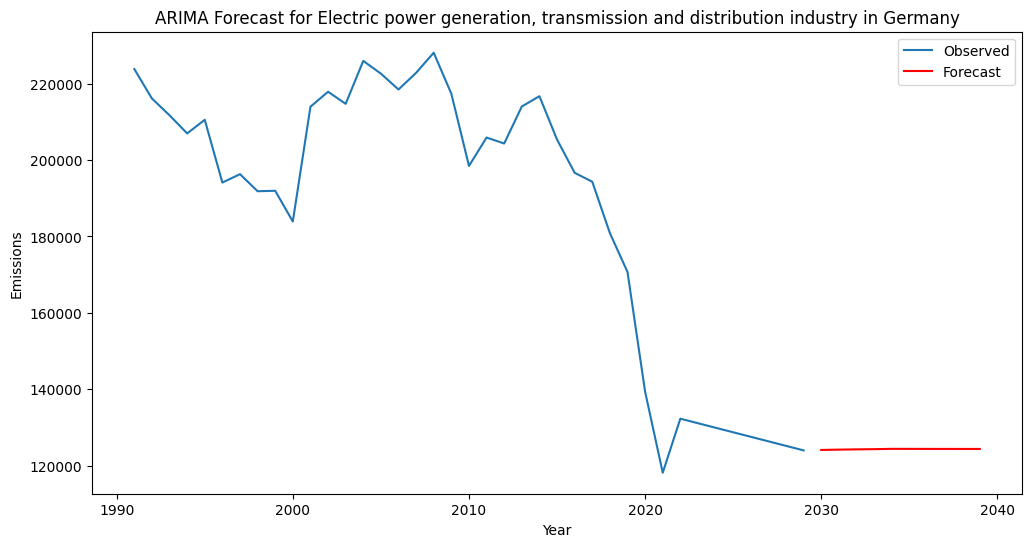

In [7]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title(f'ARIMA Forecast for {industry} in {country}')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.show()

### Statistical Analysis: Perform statistical tests to quantify the significance of trends.

In [8]:
# Group by year and country, summing emissions
country_emissions = data.groupby(['Year', 'Country'])['emissions'].sum().reset_index()

# Group by year and industry, summing emissions
industry_emissions = data.groupby(['Year', 'Industry'])['emissions'].sum().reset_index()


In [19]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

def trend_analysis(df, category_col, value_col, min_data_points=3, p_value_threshold=0.05):
    results = {
        'Country': [],
        'R-squared': [],
        'Adj. R-squared': [],
        'Slope': [],
        'Intercept': [],
        'Slope p-value': [],
        'Intercept p-value': [],
        'F-statistic': [],
        'F-statistic p-value': [],
        'Notes': []
    }
    
    for category in df[category_col].unique():
        subset = df[df[category_col] == category]
        if len(subset) >= min_data_points:
            X = sm.add_constant(np.array(subset['Year'].dt.year))
            y = subset[value_col].values
            model = sm.OLS(y, X).fit()
            p_value = model.pvalues[1]  # p-value for the slope (x1)
            
            if p_value < p_value_threshold:
                # Extract statistics
                results['Country'].append(category)
                results['R-squared'].append(model.rsquared)
                results['Adj. R-squared'].append(model.rsquared_adj)
                results['Slope'].append(model.params[1])
                results['Intercept'].append(model.params[0])
                results['Slope p-value'].append(p_value)
                results['Intercept p-value'].append(model.pvalues[0])
                results['F-statistic'].append(model.fvalue)
                results['F-statistic p-value'].append(model.f_pvalue)
                results['Notes'].append('')
            else:
                print(f"Slope for {category} is not statistically significant (p={p_value:.3f}). Skipping.")
        else:
            print(f"Not enough data points for {category}. Skipping.")
    
    return pd.DataFrame(results)

# Perform trend analysis for country emissions
country_trends_df = trend_analysis(country_emissions, 'Country', 'emissions')

# Save to a CSV file for easy access
country_trends_df.to_csv('country_trends_results.csv', index=False)


Slope for Albania is not statistically significant (p=0.607). Skipping.
Slope for Armenia is not statistically significant (p=0.076). Skipping.
Slope for Belarus is not statistically significant (p=0.956). Skipping.
Slope for Colombia is not statistically significant (p=0.649). Skipping.
Slope for Cuba is not statistically significant (p=0.325). Skipping.
Slope for DR Yemen is not statistically significant (p=nan). Skipping.
Slope for Djibouti is not statistically significant (p=0.297). Skipping.
Slope for Georgia is not statistically significant (p=0.115). Skipping.
Slope for Hong Kong is not statistically significant (p=0.503). Skipping.
Slope for Kazakhstan is not statistically significant (p=0.985). Skipping.
Slope for Kyrgyzstan is not statistically significant (p=0.593). Skipping.
Slope for Lithuania is not statistically significant (p=0.163). Skipping.
Slope for Malta is not statistically significant (p=0.175). Skipping.
Slope for Palestine is not statistically significant (p=na

In [21]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

def trend_analysis(df, category_col, value_col, min_data_points=3, p_value_threshold=0.05):
    results = {
        'Category': [],
        'R-squared': [],
        'Adj. R-squared': [],
        'Slope': [],
        'Intercept': [],
        'Slope p-value': [],
        'Intercept p-value': [],
        'F-statistic': [],
        'F-statistic p-value': [],
        'Notes': []
    }
    
    for category in df[category_col].unique():
        subset = df[df[category_col] == category]
        if len(subset) >= min_data_points:
            X = sm.add_constant(np.array(subset['Year'].dt.year))
            y = subset[value_col].values
            model = sm.OLS(y, X).fit()
            p_value = model.pvalues[1]  # p-value for the slope (x1)
            
            if p_value < p_value_threshold:
                # Extract statistics
                results['Category'].append(category)
                results['R-squared'].append(model.rsquared)
                results['Adj. R-squared'].append(model.rsquared_adj)
                results['Slope'].append(model.params[1])
                results['Intercept'].append(model.params[0])
                results['Slope p-value'].append(p_value)
                results['Intercept p-value'].append(model.pvalues[0])
                results['F-statistic'].append(model.fvalue)
                results['F-statistic p-value'].append(model.f_pvalue)
                results['Notes'].append('')
            else:
                print(f"Slope for {category} is not statistically significant (p={p_value:.3f}). Skipping.")
        else:
            print(f"Not enough data points for {category}. Skipping.")
    
    return pd.DataFrame(results)

# Perform trend analysis for industry emissions
industry_trends_df = trend_analysis(industry_emissions, 'Industry', 'emissions')

# Save to a CSV file for easy access
industry_trends_df.to_csv('industry_trends_results.csv', index=False)


Slope for Administrative services product is not statistically significant (p=nan). Skipping.
Slope for Air transport industry is not statistically significant (p=0.118). Skipping.
Slope for Air transport product is not statistically significant (p=nan). Skipping.
Slope for Alcoholic and other  beverages product is not statistically significant (p=nan). Skipping.
Slope for Aluminium ore product is not statistically significant (p=nan). Skipping.
Slope for Animal oils and fats product is not statistically significant (p=nan). Skipping.
Slope for Arts, entertainment and recreation product is not statistically significant (p=nan). Skipping.
Slope for Basic Copper product is not statistically significant (p=nan). Skipping.
Slope for Basic Gold product is not statistically significant (p=nan). Skipping.
Slope for Basic aluminium product is not statistically significant (p=nan). Skipping.
Slope for Basic inorganic chemicals product is not statistically significant (p=nan). Skipping.
Slope fo

### Statistical Analysis: Visualize results

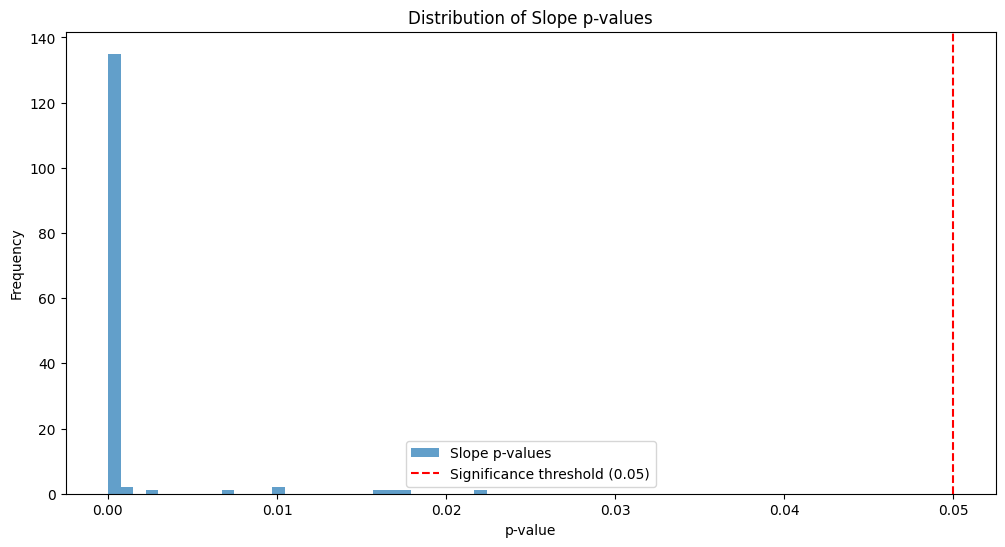

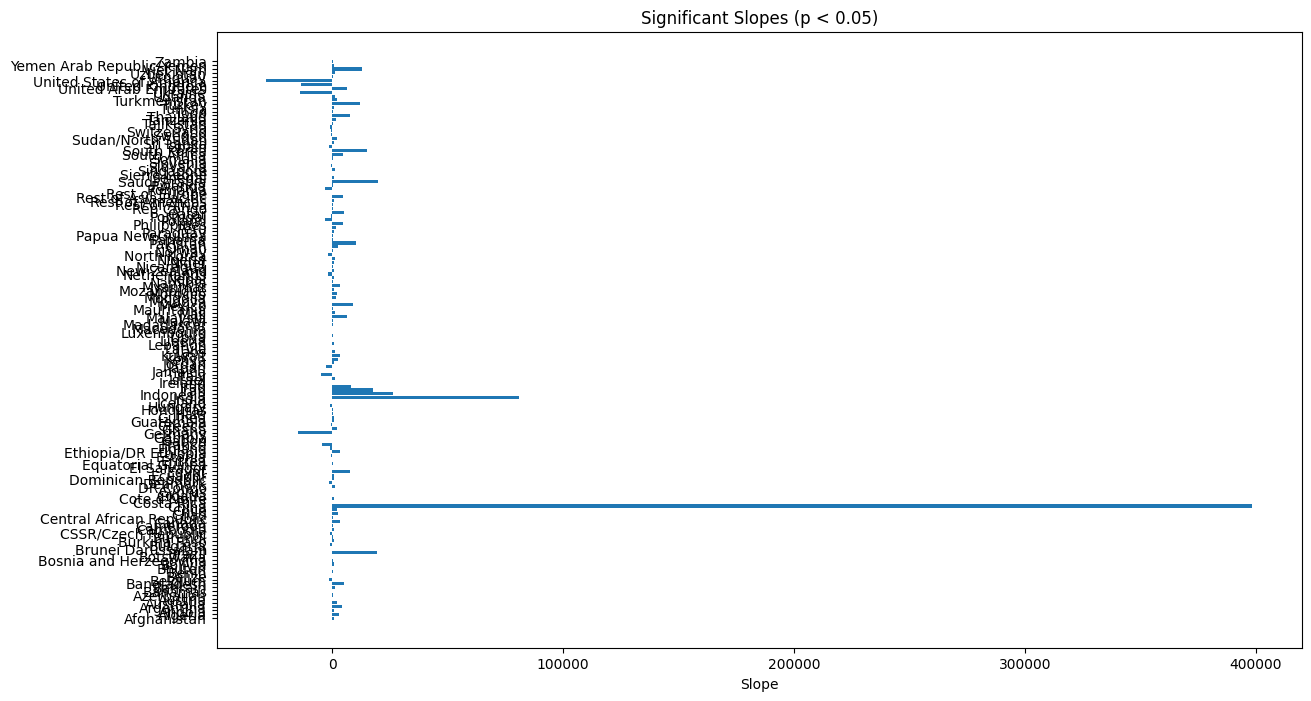

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of p-values for significant slopes
plt.figure(figsize=(12, 6))
plt.hist(country_trends_df['Slope p-value'], bins=30, alpha=0.7, label='Slope p-values')
plt.axvline(x=0.05, color='r', linestyle='--', label='Significance threshold (0.05)')
plt.title('Distribution of Slope p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Bar chart for significant slopes
plt.figure(figsize=(14, 8))
significant_df = country_trends_df[country_trends_df['Slope p-value'] < 0.05]
plt.barh(significant_df['Country'], significant_df['Slope'])
plt.xlabel('Slope')
plt.title('Significant Slopes (p < 0.05)')
plt.show()
